### Here we will try to find which years are good top rated movies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Now lets try to load the movie data 


In [69]:
#Loading movie data
movies = pd.read_csv('moviedata\movies.csv', sep=',')
movies.head()
print(movies.shape)

(27278, 3)


In [133]:
#Lets load ratings for that movies
ratings = pd.read_csv('moviedata\\ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [9]:
#Lets load the tags data too
tags = pd.read_csv('moviedata\\tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


#### 1. Let's see how people liked specific genre movies over the years

In [70]:
#Now lets see how many years of movie data collection we have
#Lets extract the year from the movie name and add it as a new column in the DF
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


* First we will try to remove the nan values from df

In [71]:
#Deleting null values from movies data
print(movies.shape)
print(movies.isnull().any())
new_data = movies.dropna(axis = 0, how ='any')
print(new_data.isnull().any())
new_data.shape

(27278, 4)
movieId    False
title      False
genres     False
year        True
dtype: bool
movieId    False
title      False
genres     False
year       False
dtype: bool


(27261, 4)

In [105]:
#Now lets remove invalid year values from year column
#Here we will convert the non numeric values to the numeric for year row, any non-numeric values will become NaN
new_data['year'] = pd.to_numeric(new_data['year'], errors='coerse', downcast='integer')
new_data.head()
print(new_data.shape)
print(new_data.isnull().any())
#Now lets remove the NaN entries to get the cleaned data
cleaned_mdata = new_data.dropna(axis = 0, how ='any')
print(cleaned_mdata.shape)


(27261, 4)
movieId    False
title      False
genres     False
year        True
dtype: bool
(27255, 4)


C:\Users\siva.mulagala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
### Now we have the year column in the df, Now lets try to find out the years with unique values
unique_years = cleaned_mdata['year'].unique()
len(unique_years)

118

* As we can see in the above result, We have 118 years of data

In [ ]:
* Group the movies based on year

In [139]:
cleaned_mdata.head()
movies_by_year = cleaned_mdata[['title', 'genres', 'year']].groupby('year', 'genres').count()
# movies_by_year = cleaned_mdata.groupby('year')['year']

# movies_by_year['title'].count().max()
# cleaned_mdata.iloc[cleaned_mdata['title'].idxmax()]
movies_by_year.tail(10)

ValueError: No axis named genres for object type <class 'type'>

        title  genres
year                 
1891.0      1       1
1893.0      1       1
1894.0      2       2
1895.0      2       2
1896.0      2       2
     year  title  genres
0  2015.0    120     120
1  2014.0    740     740
2  2013.0   1011    1011
3  2012.0   1022    1022
4  2011.0   1016    1016
5  2010.0    962     962
6  2009.0   1113    1113
7  2008.0    979     979
8  2007.0    902     902
9  2006.0    855     855


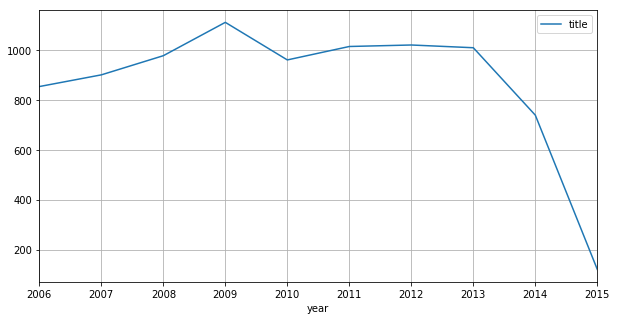

In [188]:
movies_count = cleaned_mdata.groupby('year')['title','genres'].count()
print(movies_count.head())
s_movie_count = movies_count.sort_values(by = 'year', ascending=False).head(10)
s = s_movie_count.reset_index()
print(s)
s.plot(x='year', y='title' ,figsize=(10,5), grid=True  )




In [172]:
tag_count = movies_count['title'].value_counts()
tag_count.head()

1      8
17     4
107    3
2      3
101    3
Name: title, dtype: int64